In [90]:
#Importando as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import normaltest,pearsonr,shapiro,f_oneway
from statsmodels.stats.multicomp import MultiComparison
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import math
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from yellowbrick.classifier import ConfusionMatrix

# 2- Coleta de Dados

In [2]:
#leitura dos dados heart.csv
df_hd = pd.read_csv('heart.csv')
df_hd


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
#leitura dos dados heart_statlog_cleveland_hungary_final.csv
df_hs = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df_hs

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [4]:
#descrição df_hd
df_hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
#descrição df_hs
df_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


# 3- Processamento/Tratamento de Dados

In [6]:
#Alterando as colunas do dataset df_hs

df_hs.rename(columns={'chest pain type': 'cp', 'resting bp s': 'trestbps', 'cholesterol': 'chol', 
                     'fasting blood sugar': 'fbs', 'resting ecg': 'restecg', 'max heart rate': 'thalach',
                     'exercise angina': 'exang', 'ST slope': 'slope'}, inplace = True)

In [7]:
df_hs.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'target'],
      dtype='object')

Alteração na coluna cp do dataset df_hs

In [8]:
#Mostrando os dados df_hs 
df_hs['cp'].unique()

array([2, 3, 4, 1], dtype=int64)

In [9]:
#Mostrando os dados df_hd
df_hd['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [10]:
#Alteração do padrão do dataset df_hs para o padrão do dataset df_hd
df_hs['cp'] = df_hs['cp'].map({1:0, 2:1, 3:2, 4:3}, na_action=None)

In [11]:
#confirmando que a alteração foi realizada
df_hs['cp'].unique()

array([1, 2, 3, 0], dtype=int64)

In [12]:
#Mostrando no dataset a alteração
df_hs.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,2,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,3,138,214,0,0,108,1,1.5,2,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0


Alteração na coluna slope do dataset df_hs

In [13]:
#Verificando quantas vezes cada categoria da coluna slope aparece na base de dados
df_hs.groupby(['slope']).count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
slope,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1
1,526,526,526,526,526,526,526,526,526,526,526
2,582,582,582,582,582,582,582,582,582,582,582
3,81,81,81,81,81,81,81,81,81,81,81


In [14]:
#Removando a linha com slope igual a 0
df_hs.drop(df_hs.loc[df_hs['slope']==0].index, inplace=True)

In [15]:
#Confirmando que foi removida
df_hs.groupby(['slope']).count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
slope,,,,,,,,,,,
1,526,526,526,526,526,526,526,526,526,526,526
2,582,582,582,582,582,582,582,582,582,582,582
3,81,81,81,81,81,81,81,81,81,81,81


In [16]:
#Mostrando os dados df_hs 
df_hs['slope'].unique()

array([1, 2, 3], dtype=int64)

In [17]:
#Mostrando os dados df_hd
df_hd['slope'].unique()

array([2, 0, 1], dtype=int64)

In [18]:
#Alteração do padrão do dataset df_hs para o padrão do dataset df_hd
df_hs['slope'] = df_hs['slope'].map({1:0, 2:1, 3:2}, na_action=None)

In [19]:
#confirmando que a alteração foi realizada
df_hs['slope'].unique()

array([0, 1, 2], dtype=int64)

In [20]:
#Mostrando no dataset a alteração
df_hs.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0


Junção da base de dados

In [21]:
#Junção dataset df_hs e df_hd
df_heartD = pd.merge(df_hs, df_hd, how = 'outer')

In [22]:
df_heartD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2214 entries, 0 to 2213
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2214 non-null   int64  
 1   sex       2214 non-null   int64  
 2   cp        2214 non-null   int64  
 3   trestbps  2214 non-null   int64  
 4   chol      2214 non-null   int64  
 5   fbs       2214 non-null   int64  
 6   restecg   2214 non-null   int64  
 7   thalach   2214 non-null   int64  
 8   exang     2214 non-null   int64  
 9   oldpeak   2214 non-null   float64
 10  slope     2214 non-null   int64  
 11  target    2214 non-null   int64  
 12  ca        1025 non-null   float64
 13  thal      1025 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 259.5 KB


In [23]:
#Verificação dos dados nulos
df_heartD.isnull().sum()

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
target         0
ca          1189
thal        1189
dtype: int64

In [24]:
#Exclusão colunas ca e thal
df_heartD = df_heartD.drop(columns=['ca', 'thal'])

In [25]:
#Confirmando a exclusão das colunas 
df_heartD.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0


In [26]:
df_heartD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2214 entries, 0 to 2213
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2214 non-null   int64  
 1   sex       2214 non-null   int64  
 2   cp        2214 non-null   int64  
 3   trestbps  2214 non-null   int64  
 4   chol      2214 non-null   int64  
 5   fbs       2214 non-null   int64  
 6   restecg   2214 non-null   int64  
 7   thalach   2214 non-null   int64  
 8   exang     2214 non-null   int64  
 9   oldpeak   2214 non-null   float64
 10  slope     2214 non-null   int64  
 11  target    2214 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 224.9 KB


In [27]:
#Verificando quantidade de linhas duplicadas
df_heartD.duplicated().sum()

995

In [28]:
df_heartD.to_csv('heart_diseases.csv')

# 4- Análise e Exploração dos Dados

Text(0, 0.5, 'Total')

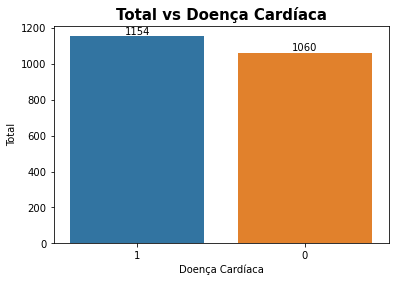

In [29]:
#Quantos valores "não há doença cardíaca" (0) e "há doença cardíaca" (1) existem no dataset?
ax = sns.countplot(x = df_heartD['target'], order=df_heartD['target'].value_counts(ascending=False).index);
abs_values = df_heartD['target'].value_counts(ascending=False).values;
ax.bar_label(container=ax.containers[0], labels=abs_values);
ax.set_title('Total vs Doença Cardíaca', fontsize = 15, loc ='center', weight = 'bold')
ax.set_xlabel('Doença Cardíaca')
ax.set_ylabel('Total')

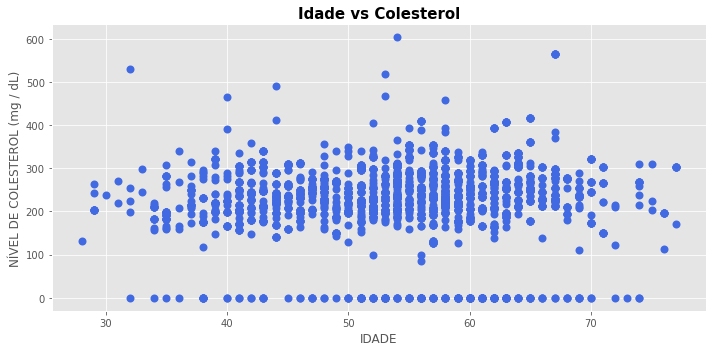

In [30]:
#Qual a relação entre a idade dos pacientes e o nível de colesterol?
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter('age','chol', data = df_heartD, linewidth = 2, color = "royalblue")
ax.set_title('Idade vs Colesterol', fontsize = 15, loc ='center', weight = 'bold')
ax.set_xlabel('IDADE')
ax.set_ylabel('NÍVEL DE COLESTEROL (mg / dL)')
plt.tight_layout()

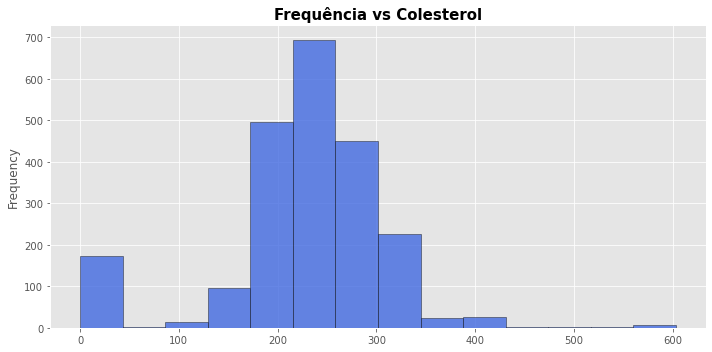

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
ax = df_heartD.chol.plot.hist (bins = 14, color = "royalblue", ec = "k", alpha = .8)
ax.set_title("Frequência vs Colesterol", fontsize = 15, loc = 'center', weight = 'bold')
plt.tight_layout();

Text(0, 0.5, 'Total')

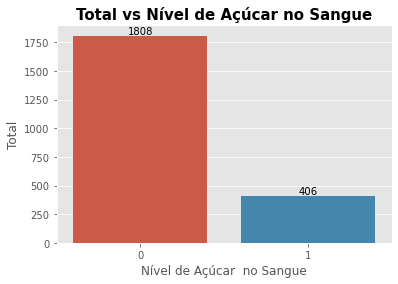

In [32]:
#Quantos pacientes com nível açúcar no sangue alto existem no dataset?
ax = sns.countplot(x = df_heartD['fbs'], order=df_heartD['fbs'].value_counts(ascending=False).index);
abs_values = df_heartD['fbs'].value_counts(ascending=False).values;
ax.bar_label(container=ax.containers[0], labels=abs_values);
ax.set_title('Total vs Nível de Açúcar no Sangue', fontsize = 15, loc ='center', weight = 'bold')
ax.set_xlabel('Nível de Açúcar  no Sangue')
ax.set_ylabel('Total')

In [33]:
#Qual a análise descritiva do dataset?
df_heartD.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,2214.00,2214.00,2214.00,2214.00,2214.00,2214.00,2214.00,2214.00,2214.00,2214.00,2214.00,2214.00
mean,54.04,0.73,1.64,131.89,226.87,0.18,0.62,144.08,0.36,0.99,0.98,0.52
std,9.23,0.44,1.17,17.98,84.11,0.39,0.74,24.83,0.48,1.13,0.72,0.50
min,28.00,0.00,0.00,0.00,0.00,0.00,0.00,60.00,0.00,-2.60,0.00,0.00
25%,47.00,0.00,0.00,120.00,202.25,0.00,0.00,126.00,0.00,0.00,0.00,0.00
50%,55.00,1.00,2.00,130.00,234.00,0.00,0.00,146.50,0.00,0.80,1.00,1.00
75%,61.00,1.00,3.00,140.00,273.00,0.00,1.00,162.00,1.00,1.60,1.00,1.00
max,77.00,1.00,3.00,200.00,603.00,1.00,2.00,202.00,1.00,6.20,2.00,1.00


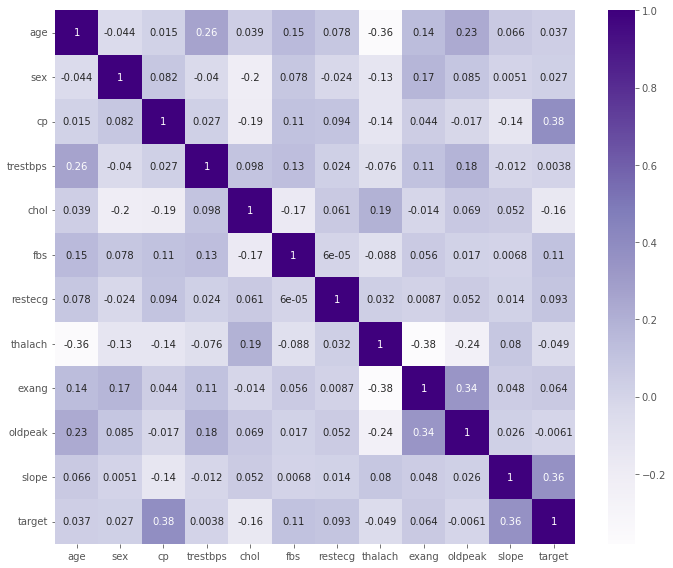

In [34]:
#Qual o grau de correlação entre as variáveis do dataset?
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(df_heartD.corr() , fmt= '.2g', cmap = 'Purples', annot= True )
plt.tight_layout()

# 5- Criação de Modelos de Machine Learning

<h3>Divisão dos Dados em Treinamento e Teste <h3>

In [35]:
#Divisão dos atributos previsores
X_heart = df_heartD.drop('target', axis = 1)
y_heart = df_heartD.target

In [36]:
#escolonamento do atributo
X_heart = StandardScaler().fit_transform(X_heart)

In [37]:
#divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X_heart, y_heart, test_size = 0.30)

In [38]:
X_train.shape, y_train.shape

((1549, 11), (1549,))

In [39]:
X_test.shape, y_test.shape

((665, 11), (665,))

<h3> Árvore de Decissão <h3>

In [40]:
#Treino do modelo
tree_heart = DecisionTreeClassifier(random_state=0, criterion='entropy')
tree_heart = tree_heart.fit(X_train, y_train)

#Acurária do treinamento
acTrAD = tree_heart.score(X_train, y_train)
print("Acurácia (base de treinamento): {0:.2f}%\n".format(100*acTrAD) )

#Teste do modelo
y_pred = tree_heart.predict(X_test)
#Acurácia do teste
acAD = accuracy_score(y_test, y_pred)
print("\nAcurácia do modelo: {0:.2f}%\n".format(100*acAD))
#Métricas do modelo
print(classification_report(y_test, y_pred))

#Matriz de confusão
print("Matriz de Confusão")
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix)
print(cnf_table)

Acurácia (base de treinamento): 100.00%


Acurácia do modelo: 93.08%

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       315
           1       0.94      0.92      0.93       350

    accuracy                           0.93       665
   macro avg       0.93      0.93      0.93       665
weighted avg       0.93      0.93      0.93       665

Matriz de Confusão
     0    1
0  296   19
1   27  323


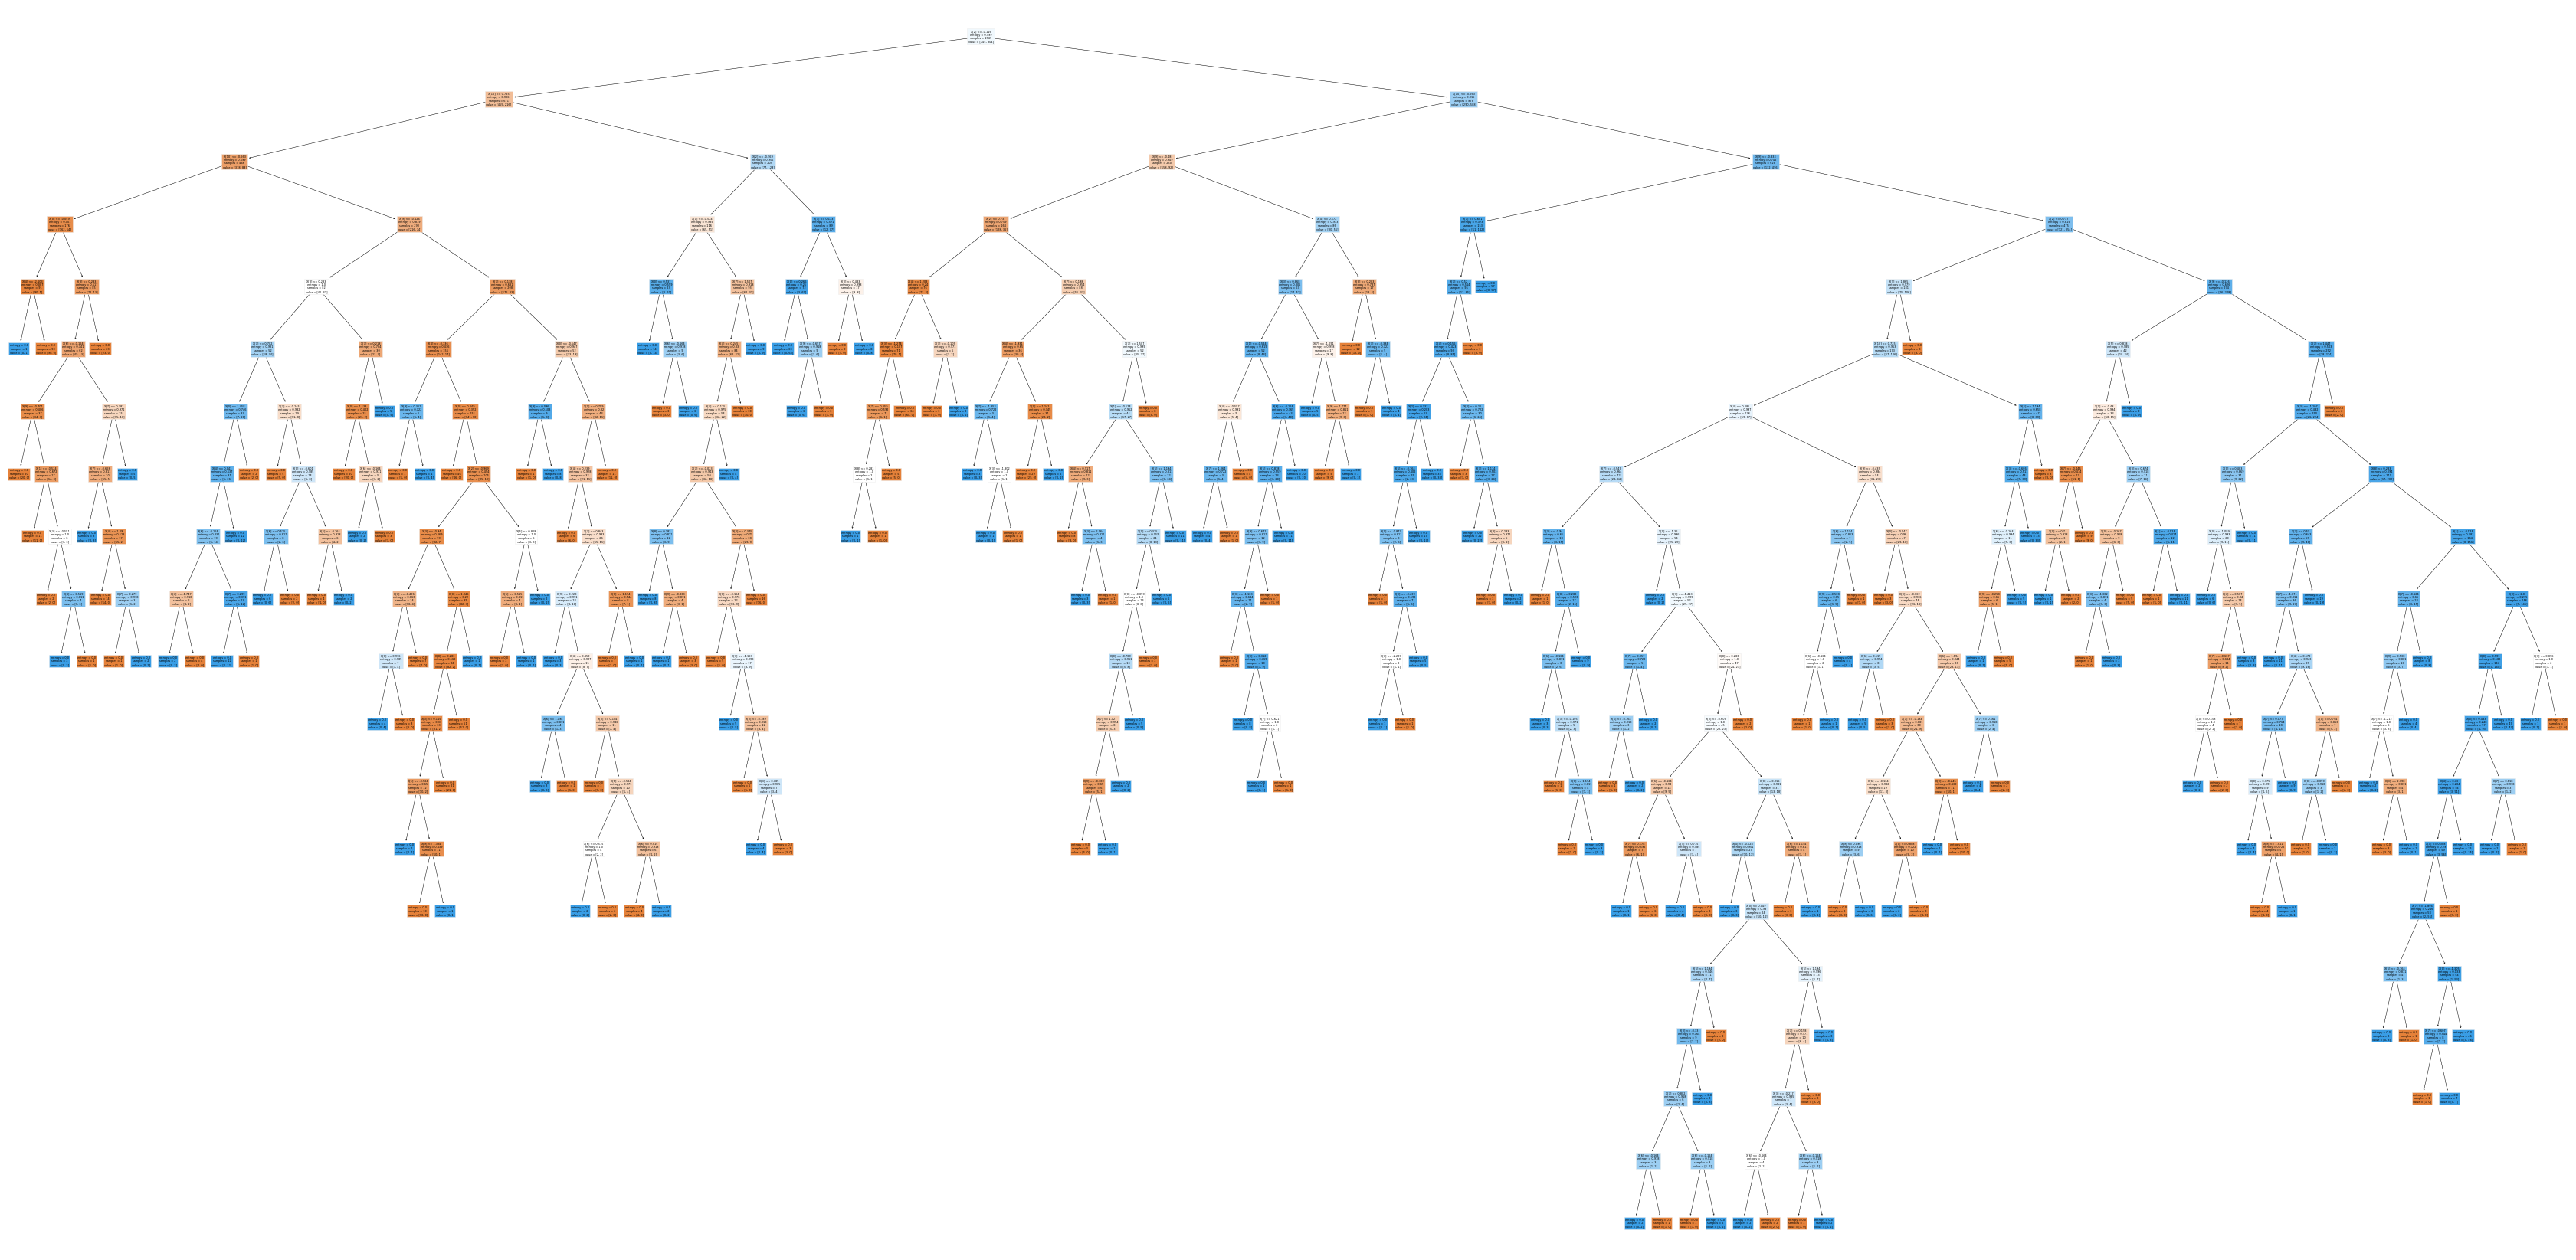

In [41]:
#Gerar árvore de decisão
plt.figure(figsize=(60,30))
plot_tree(tree_heart, filled=True)
plt.savefig('imagear.png')

<h3> Naive Bayes <h3>

In [42]:
#Treino e teste do modelo
gnb_heart = GaussianNB().fit(X_train, y_train)
y_predNB = gnb_heart.predict(X_test)

#Acurária do treinamento
acTrNB = gnb_heart.score(X_train, y_train)
print("Acurácia (base de treinamento): {0:.2f}%\n".format(100*acTrNB) )

print("Número de erros de classificação {0} de {1}"
      .format((y_test != y_predNB).sum(), y_test.shape[0]))

#Acurácia do teste
acNB = gnb_heart.score(X_test, y_test)
print("\nAcurácia do modelo: {0:.2f}%\n".format(100*acNB))
#Métricas do modelo
print(classification_report(y_test, y_predNB))

#Matriz de confusão
print("Matriz de Confusão")
cnf_matrixNB = confusion_matrix(y_test, y_predNB)
cnf_tableNB = pd.DataFrame(data=cnf_matrixNB)
print(cnf_tableNB)

Acurácia (base de treinamento): 73.98%

Número de erros de classificação 174 de 665

Acurácia do modelo: 73.83%

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       315
           1       0.79      0.68      0.73       350

    accuracy                           0.74       665
   macro avg       0.74      0.74      0.74       665
weighted avg       0.75      0.74      0.74       665

Matriz de Confusão
     0    1
0  253   62
1  112  238


<h3> Regressão Logística <h3>

In [43]:
#Treino do modelo
lreg_heart = LogisticRegression().fit(X_train, y_train)
#Teste do modelo
y_predLReg = lreg_heart.predict(X_test)

#Acurária do treinamento
acTrLReg = lreg_heart.score(X_train, y_train)
print("Acurácia (base de treinamento): {0:.2f}%\n".format(100*acTrLReg) )

#Acurária do teste
acLReg = accuracy_score(y_test, y_predLReg)
print("\nAcurácia do modelo: {0:.2f}%\n".format(100*acLReg))
#Métricas do modelo
print(classification_report(y_test, y_predLReg))

#coeficientes das variáveis de entrada gerado pelo modelo
print("Regressão Logística: w: {}  b: {} \n".format(lreg_heart.coef_, lreg_heart.intercept_))
print("Número de atributos usados: {} \n".format(np.sum(lreg_heart.coef_ != 0)))

#Matriz de confusão
print("Matriz de Confusão")
cnf_matrixLReg = confusion_matrix(y_test, y_predLReg)
cnf_tableLReg = pd.DataFrame(data=cnf_matrixLReg)
print(cnf_tableLReg)

Acurácia (base de treinamento): 76.82%


Acurácia do modelo: 74.59%

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       315
           1       0.74      0.79      0.77       350

    accuracy                           0.75       665
   macro avg       0.75      0.74      0.74       665
weighted avg       0.75      0.75      0.75       665

Regressão Logística: w: [[ 0.02180907 -0.13201369  1.15879285 -0.0379453  -0.30760043  0.15161483
   0.13969923  0.04569463  0.0812379  -0.08075158  1.13689175]]  b: [0.12645281] 

Número de atributos usados: 11 

Matriz de Confusão
     0    1
0  219   96
1   73  277


# 6- Interpretação dos Resultados

In [44]:
#Arrays para salvar os valores do cross validation
resultadoTreeh = []
resultadoGnbh = []
resultadoLrh = []

In [45]:
#Cross Validation Árvore de Decisão
for i in range(10):
    kfold = KFold(n_splits=10,shuffle=True,random_state=i)
    scores1 = cross_val_score(tree_heart, X_train, y_train, cv = kfold)
    resultadoTreeh.append(scores1.mean())
print(f'AD: {len(resultadoTreeh)}')

#Cross Validation Naive Bayes
for i in range(10):
    kfold = KFold(n_splits=10,shuffle=True,random_state=i)
    scores2 = cross_val_score(gnb_heart, X_train, y_train, cv = kfold)
    resultadoGnbh.append(scores2.mean())
print(f'NB: {len(resultadoGnbh)}')

#Cross Validation Regressão Logística
for i in range(10):
    kfold = KFold(n_splits=10,shuffle=True,random_state=i)
    scores3 = cross_val_score(lreg_heart, X_train, y_train, cv = kfold)
    resultadoLrh.append(scores3.mean())
print(f'RL: {len(resultadoLrh)}')

AD: 10
NB: 10
RL: 10


In [46]:
#Transformando os arrays em dataframe
resultados = pd.DataFrame({'Árvore de Decisão': resultadoTreeh,
                           'Naive Bayes':resultadoGnbh,
                           'Regressão Logística':resultadoLrh
                           })

In [47]:
#Imprimindo os valores do cross validation
resultados.head(10)

,Árvore de Decisão,Naive Bayes,Regressão Logística
0,0.883150,0.733381,0.763708
1,0.889610,0.738546,0.760499
2,0.888303,0.735320,0.766938
3,0.894135,0.737905,0.761818
4,0.881219,0.733372,0.766284
5,0.894139,0.742401,0.767599
6,0.899933,0.733368,0.762430
7,0.883770,0.735308,0.761131
8,0.879925,0.734005,0.760482
9,0.885107,0.730809,0.760507


In [137]:
#Coeficiente de Variação
(resultados.std()/resultados.mean())*100

Árvore de Decisão      0.733077
Naive Bayes            0.454428
Regressão Logística    0.370063
dtype: float64

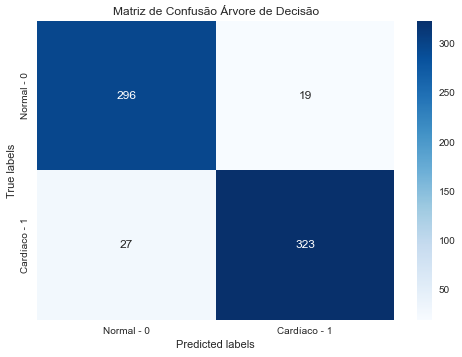

In [135]:
#gráfico de matriz de confusão para árvore de decisão
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, ax=ax, cmap=plt.cm.Blues, fmt='.3g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Matriz de Confusão Árvore de Decisão') 
ax.xaxis.set_ticklabels(['Normal - 0', 'Cardíaco - 1']); ax.yaxis.set_ticklabels(['Normal - 0', 'Cardíaco - 1'])
ax=fig.add_subplot(3, 1, (1, 2))


[Text(0, 0.5, 'Normal - 0'), Text(0, 1.5, 'Cardíaco - 1')]

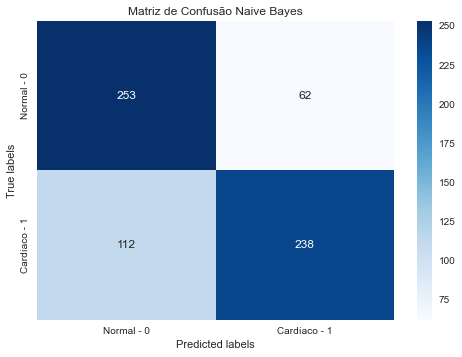

In [131]:
#gráfico de matriz de confusão para Naive Bayes
axNB = plt.subplot()
sns.heatmap(cnf_matrixNB, annot=True, ax=axNB, cmap=plt.cm.Blues, fmt='.3g')
axNB.set_xlabel('Predicted labels');axNB.set_ylabel('True labels') 
axNB.set_title('Matriz de Confusão Naive Bayes') 
axNB.xaxis.set_ticklabels(['Normal - 0', 'Cardíaco - 1']); axNB.yaxis.set_ticklabels(['Normal - 0', 'Cardíaco - 1'])

[Text(0, 0.5, 'Normal - 0'), Text(0, 1.5, 'Cardíaco - 1')]

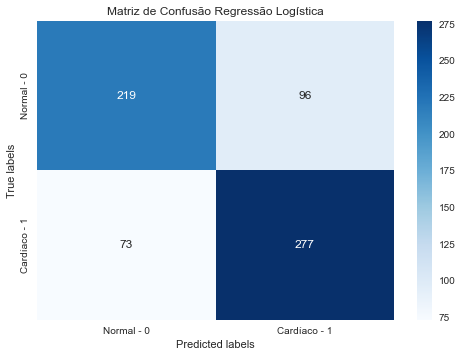

In [130]:
#gráfico de matriz de confusão para regressão logística
axLReg = plt.subplot()
sns.heatmap(cnf_matrixLReg, annot=True, ax=axLReg, cmap=plt.cm.Blues, fmt='.3g')
axLReg.set_xlabel('Predicted labels');axLReg.set_ylabel('True labels') 
axLReg.set_title('Matriz de Confusão Regressão Logística') 
axLReg.xaxis.set_ticklabels(['Normal - 0', 'Cardíaco - 1']); axLReg.yaxis.set_ticklabels(['Normal - 0', 'Cardíaco - 1'])